In [1]:
# In this lab, your task is to show the relationship between the fare paid and survival from the ship’s sinking.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


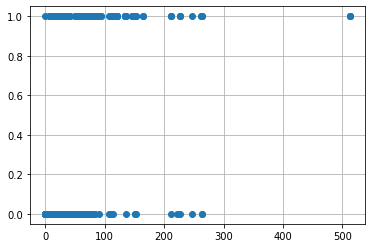

In [5]:
plt.plot(df['Fare'], df['Survived'], 'o')
plt.grid(True)

In [8]:
df.groupby('Survived')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,545.0,22.208584,31.484153,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [10]:
data_survived_fare = df[df['Survived'] == 1]['Fare']
data_survived_fare

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
871     7.2250
875    83.1583
876    26.0000
883    30.0000
885    30.0000
Name: Fare, Length: 342, dtype: float64

(array([233.,  70.,  23.,   2.,   7.,   4.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

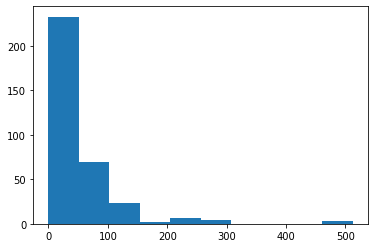

In [11]:
plt.hist(data_survived_fare)

(array([417.,  83.,  25.,   6.,   4.,   4.,   0.,   0.,   3.,   3.]),
 array([  0. ,  26.3,  52.6,  78.9, 105.2, 131.5, 157.8, 184.1, 210.4,
        236.7, 263. ]),
 <a list of 10 Patch objects>)

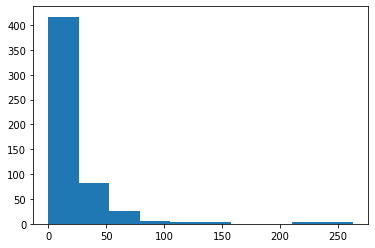

In [12]:
data_nonsurvived_fare = df[df['Survived'] == 0]['Fare']
data_nonsurvived_fare
plt.hist(data_nonsurvived_fare)

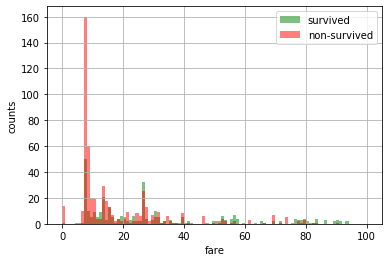

In [14]:
plt.hist(data_survived_fare, bins=100, range=(0, 100), alpha=0.5, color='green')
plt.hist(data_nonsurvived_fare, bins=100, range=(0, 100), alpha=0.5, color='red')
plt.xlabel('fare')
plt.ylabel('counts')
plt.legend(['survived','non-survived'])
plt.grid(True)

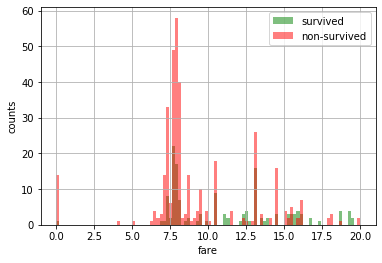

In [15]:
plt.hist(data_survived_fare, bins=100, range=(0, 20), alpha=0.5, color='green')
plt.hist(data_nonsurvived_fare, bins=100, range=(0, 20), alpha=0.5, color='red')
plt.xlabel('fare')
plt.ylabel('counts')
plt.legend(['survived','non-survived'])
plt.grid(True)